In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("/content/gdrive/My Drive/dl_coursework")

In [0]:
import torch
import copy
import utils
import decoder
import trainnet
import wavelet
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# read an image and convert it to tensor
img_path = './test_data/sf4_rgb.png'
img_pil = Image.open(img_path)
img_np = utils.pil_numpy(img_pil)
img_tensor = utils.np_tensor(img_np)
img_tensor = img_tensor.cuda()

In [0]:
# k=32
dd_net_32 = decoder.Decoder(k_channels=32,
                      output_channels=3,
                      upsample_times=5)
dd_net_32 = dd_net_32.cuda()

In [0]:
numit = 20000
lr = 0.005

In [0]:
net_32, mse_n_32, mse_t_32, net_input_32 = trainnet.train_net(net = dd_net_32,
                                  num_epoches = numit,
                                  lr = 0.005,
                                  img_noisy = img_tensor,
                                  img_clean = img_tensor,
                                  k_channels = 32)

tensor(0.0624, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0083, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0078, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0077, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0076, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0076, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0075, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0073, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0073, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0073, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0072, device='cuda:0', grad_fn=<MseLossBackward

When k = 32
 The number of net parameters is: 6624
 Compression factor is: 118.72
 The PSNR of deep decoder is: 21.42
 The PSNR of wavelet is 20.51


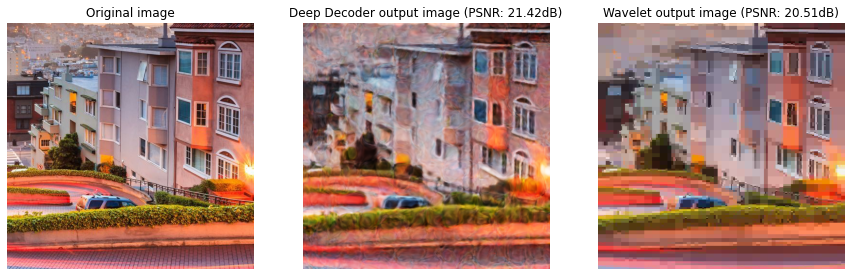

In [0]:
print('When k = 32')

net_32_param_num = utils.parameters_number(net_32)
print(' The number of net parameters is:', net_32_param_num)

image_pixels_num = img_np.shape[0]*img_np.shape[1]*img_np.shape[2]
print(' Compression factor is: %.2f' % (image_pixels_num / net_32_param_num))

image_dd_32 = net_32(net_input_32).cpu().detach().numpy()[0]
mse_dd_32 = F.mse_loss(torch.tensor(image_dd_32), torch.tensor(img_np)).item()
psnr_dd_32 = 10.*np.log(1.0**2/mse_dd_32)/np.log(10.)
print(' The PSNR of deep decoder is: %.2f' % psnr_dd_32)

image_wvl_32 = wavelet.denoise_wavelet(img_np, num_coeffs=net_32_param_num//img_np.shape[0] , to_ycbcr=True, mode='hard', multichannel=True)
mse_wvl_32 = F.mse_loss(torch.tensor(image_wvl_32), torch.tensor(img_np)).item()
psnr_wvl_32 = 10.*np.log(1.0**2/mse_wvl_32)/np.log(10.)
print(' The PSNR of wavelet is %.2f' % psnr_wvl_32)

utils.comparison_show(img_origin=img_np, img_dd=image_dd_32, img_wvl=image_wvl_32)

In [0]:
# k=64
dd_net_64 = decoder.Decoder(k_channels=64,
                      output_channels=3,
                      upsample_times=5)
dd_net_64 = dd_net_64.cuda()

In [0]:
net_64, mse_n_64, mse_t_64, net_input_64 = trainnet.train_net(net = dd_net_64,
                                  num_epoches = numit,
                                  lr = 0.005,
                                  img_noisy = img_tensor,
                                  img_clean = img_tensor,
                                  k_channels = 64)

tensor(0.0538, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0049, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0046, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0042, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0041, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0040, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0039, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0039, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0038, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0040, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0037, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0039, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0037, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0038, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0037, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0035, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0036, device='cuda:0', grad_fn=<MseLossBackward

When k = 64
 The number of net parameters is: 25536
 Compression factor is: 30.80
 The PSNR of deep decoder is: 24.62
 The PSNR of wavelet is 23.70


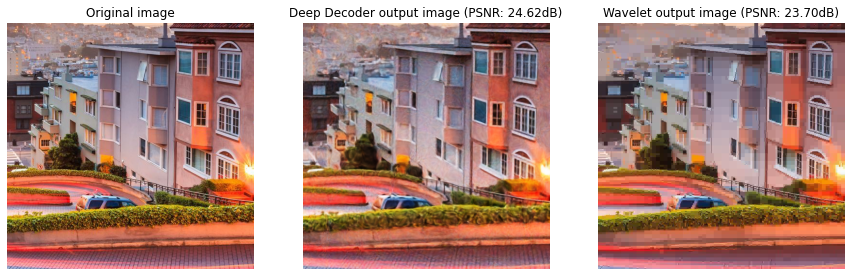

In [0]:
print('When k = 64')

net_64_param_num = utils.parameters_number(net_64)
print(' The number of net parameters is:', net_64_param_num)

image_pixels_num = img_np.shape[0]*img_np.shape[1]*img_np.shape[2]
print(' Compression factor is: %.2f' % (image_pixels_num / net_64_param_num))

image_dd_64 = net_64(net_input_64).cpu().detach().numpy()[0]
mse_dd_64 = F.mse_loss(torch.tensor(image_dd_64), torch.tensor(img_np)).item()
psnr_dd_64 = 10.*np.log(1.0**2/mse_dd_64)/np.log(10.)
print(' The PSNR of deep decoder is: %.2f' % psnr_dd_64)

image_wvl_64 = wavelet.denoise_wavelet(img_np, num_coeffs=net_64_param_num//img_np.shape[0] , to_ycbcr=True, mode='hard', multichannel=True)
mse_wvl_64 = F.mse_loss(torch.tensor(image_wvl_64), torch.tensor(img_np)).item()
psnr_wvl_64 = 10.*np.log(1.0**2/mse_wvl_64)/np.log(10.)
print(' The PSNR of wavelet is %.2f' % psnr_wvl_64)

utils.comparison_show(img_origin=img_np, img_dd=image_dd_64, img_wvl=image_wvl_64)

In [0]:
# k=96
dd_net_96 = decoder.Decoder(k_channels=96,
                      output_channels=3,
                      upsample_times=5)
dd_net_96 = dd_net_96.cuda()

In [0]:
net_96, mse_n_96, mse_t_96, net_input_96 = trainnet.train_net(net = dd_net_96,
                                  num_epoches = numit,
                                  lr = 0.005,
                                  img_noisy = img_tensor,
                                  img_clean = img_tensor,
                                  k_channels = 96)

tensor(0.0610, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0039, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0034, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0031, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0030, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0029, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0025, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0028, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0022, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0022, device='cuda:0', grad_fn=<MseLossBackward

When k = 96
 The number of net parameters is: 56736
 Compression factor is: 13.86
 The PSNR of deep decoder is: 26.90
 The PSNR of wavelet is 26.62


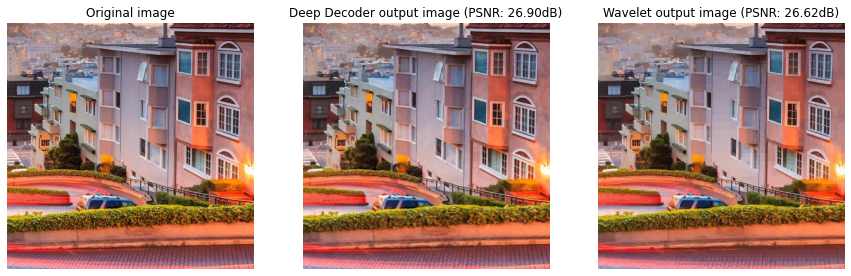

In [0]:
print('When k = 96')

net_96_param_num = utils.parameters_number(net_96)
print(' The number of net parameters is:', net_96_param_num)

image_pixels_num = img_np.shape[0]*img_np.shape[1]*img_np.shape[2]
print(' Compression factor is: %.2f' % (image_pixels_num / net_96_param_num))

image_dd_96 = net_96(net_input_96).cpu().detach().numpy()[0]
mse_dd_96 = F.mse_loss(torch.tensor(image_dd_96), torch.tensor(img_np)).item()
psnr_dd_96 = 10.*np.log(1.0**2/mse_dd_96)/np.log(10.)
print(' The PSNR of deep decoder is: %.2f' % psnr_dd_96)

image_wvl_96 = wavelet.denoise_wavelet(img_np, num_coeffs=net_96_param_num//img_np.shape[0] , to_ycbcr=True, mode='hard', multichannel=True)
mse_wvl_96 = F.mse_loss(torch.tensor(image_wvl_96), torch.tensor(img_np)).item()
psnr_wvl_96 = 10.*np.log(1.0**2/mse_wvl_96)/np.log(10.)
print(' The PSNR of wavelet is %.2f' % psnr_wvl_96)

utils.comparison_show(img_origin=img_np, img_dd=image_dd_96, img_wvl=image_wvl_96)

In [0]:
# k=128
dd_net_128 = decoder.Decoder(k_channels=128,
                      output_channels=3,
                      upsample_times=5)
dd_net_128 = dd_net_128.cuda()

In [0]:
net_128, mse_n_128, mse_t_128, net_input_128 = trainnet.train_net(net = dd_net_128,
                                  num_epoches = numit,
                                  lr = 0.005,
                                  img_noisy = img_tensor,
                                  img_clean = img_tensor,
                                  k_channels = 128)

tensor(0.0618, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0035, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0025, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0022, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0021, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward

When k = 128
 The number of net parameters is: 100224
 Compression factor is: 7.85
 The PSNR of deep decoder is: 28.30
 The PSNR of wavelet is 29.66


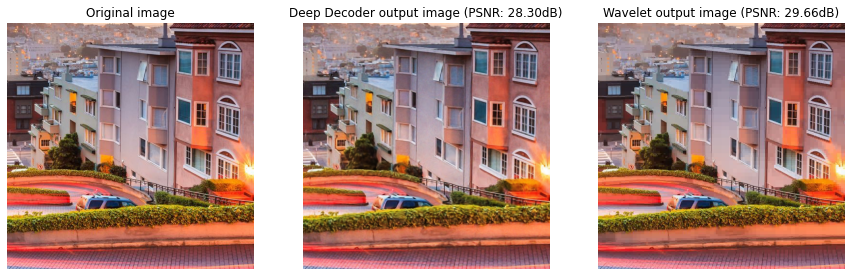

In [0]:
print('When k = 128')

net_128_param_num = utils.parameters_number(net_128)
print(' The number of net parameters is:', net_128_param_num)

image_pixels_num = img_np.shape[0]*img_np.shape[1]*img_np.shape[2]
print(' Compression factor is: %.2f' % (image_pixels_num / net_128_param_num))

image_dd_128 = net_128(net_input_128).cpu().detach().numpy()[0]
mse_dd_128 = F.mse_loss(torch.tensor(image_dd_128), torch.tensor(img_np)).item()
psnr_dd_128 = 10.*np.log(1.0**2/mse_dd_128)/np.log(10.)
print(' The PSNR of deep decoder is: %.2f' % psnr_dd_128)

image_wvl_128 = wavelet.denoise_wavelet(img_np, num_coeffs=net_128_param_num//img_np.shape[0] , to_ycbcr=True, mode='hard', multichannel=True)
mse_wvl_128 = F.mse_loss(torch.tensor(image_wvl_128), torch.tensor(img_np)).item()
psnr_wvl_128 = 10.*np.log(1.0**2/mse_wvl_128)/np.log(10.)
print(' The PSNR of wavelet is %.2f' % psnr_wvl_128)

utils.comparison_show(img_origin=img_np, img_dd=image_dd_128, img_wvl=image_wvl_128)